## Tutorial 3: The Leaky Integrate-and-Fire (LIF) Neuron
### January 26, 2023

In [25]:
## Importing libraries
import numpy as np 
import matplotlib.pyplot as plt 
from itertools import islice

#### The LIF Neuron

In [32]:
## Defining pparameters
Rm = 1e6 ## resistance (ohm)
Cm = 2e-8 ## capacitance (farad)
taum = Rm*Cm ## time constant (seconds)
EL = -.060 ## resting membrane potential (volt)
Vreset = -.070 ## membrane potential after spike (volt)
Vth = -.050 ## spike threshold (volt)
Vs = .020 ## spiking potential (volt)

#### Time Axis

In [33]:
dt = .001 ## simulation time step (seconds)
T = 1 ## total time to simulate (seconds)
time = np.linspace(dt, T, int(T/dt)) ## vector of timepoints we will simulate

#### Helper Functions

In [34]:
def initialize_simulation():
    ## Initializing membrane potential vector 'V' and spike vector 'spikes'
    V = np.zeros(time.size) ## preallocate vector for simulated membrane potentials
    spikes = np.zeros(time.size) ## vector to denote when spikes happen - spikes will be added after LIF simulation
    V[0] = EL ## set first time point to resting potential
    return V, spikes

def plot_potentials(time, V, timeSpikes):
    ## Plotting membrane potential (V) against time (time), and marks spikes with red markers (timeSpikes)
    plt.show()
    plt.plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size) * Vs, 'ro')
    plt.ylabel('membrane potential (mV)')
    plt.xlabel('time (seconds)')

#### Simulating the LIF Neuron

In [35]:
def integrate_and_fire(V, spikes, i, Ie):
    ## Function to integrate changes in local membrane potential and fire if threshold reached
    # V - vector of membrane potential
    # spikes - spike marker vector
    # i - index (applied to V and spikes) for current time step
    # Ie - input current at this time step (scalar of unit amp)
    
    # 1: calculate change in membrane potential (dV)
    dV = ((EL - V[i-1]) + (Rm*Ie)) / taum
    
    # 2: integrate over given time step (Euler method)
    V[i] = (dV*dt) + V[i-1]
    
    # 3: does the membrane potential exceed threshold (V > Vth)?
    if (V[i] > Vth):
        V[i] = Vreset
        spikes[i] = 1
    
    return V, spikes # output the membrane potential vector and the {0,1} vector of spikes

#### Problem 1: Step current input

Text(0.5, 1.0, 'Problem 1: step current input')

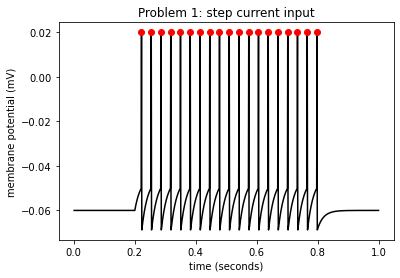

In [53]:
#////////////////////////////////////
#  Problem 1 - Step current input //
#//////////////////////////////////
#
# Implement a leaky integrate and fire (LIF) neuron with parameters given 
# above. 
# 
# Create a current input which:
#  - starts at 0 A
#  - steps up to 15 nA at stim_time[0]
#  - steps down to 0 A at stim_time[1]
#
# Output:
# Plot the resulting simulated membrane potential of the LIF neuron.

## Defining problem-specific parameters
stim_time = [0.2, 0.8] ## time (seconds) when current turns ON and turns OFF

## Initializing simulation
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time), 1, None):
    
    if (t > stim_time[0]) and (t < stim_time[1]):
        Ie =  1.5e-8
    else: 
        Ie =  0
    
    ## Calling integrate_and_fire function
    V, spikes = integrate_and_fire(V, spikes, i, Ie)
    
## Adding spikes to create membrane potential waveforms
V[spikes == 1] = Vs

## Plotting membrane potential
plot_potentials(time, V, time[spikes == 1])
plt.title('Problem 1: step current input') 

#### Problem 2: Oscillating current input

Text(0.5, 1.0, 'Problem 1: step current input')

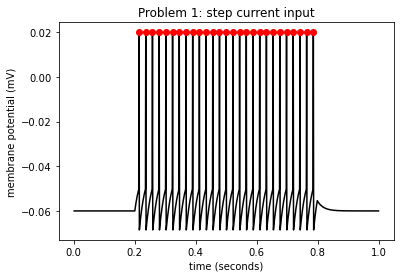

In [54]:
## Using the implementation of the LIF neuron model with the same parameters to create a current input that starts at 0 A, 
## begins oscillating with amplitude 20 nA at 200 ms, then stops oscillating and returns to 0 A at 800 ms. 

## Defining problem-specific parameters
stim_time = [0.2, 0.8] ## time (seconds) when current turns ON and turns OFF

## Initializing simulation
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time), 1, None):
    
    if (t > stim_time[0]) and (t < stim_time[1]):
        Ie =  2e-8
    else: 
        Ie =  0
    
    ## Calling integrate_and_fire function
    V, spikes = integrate_and_fire(V, spikes, i, Ie)
    
## Adding spikes to create membrane potential waveforms
V[spikes == 1] = Vs

## Plotting membrane potential
plot_potentials(time, V, time[spikes == 1])
plt.title('Problem 1: step current input') 

## How does this change the dynamics of the neuron, and how does this change with the amplitude of the input?

In [55]:
np.arange(0, 25e-9, 1e-9)

array([0.0e+00, 1.0e-09, 2.0e-09, 3.0e-09, 4.0e-09, 5.0e-09, 6.0e-09,
       7.0e-09, 8.0e-09, 9.0e-09, 1.0e-08, 1.1e-08, 1.2e-08, 1.3e-08,
       1.4e-08, 1.5e-08, 1.6e-08, 1.7e-08, 1.8e-08, 1.9e-08, 2.0e-08,
       2.1e-08, 2.2e-08, 2.3e-08, 2.4e-08])

Text(0.5, 0, 'temporal frequency')

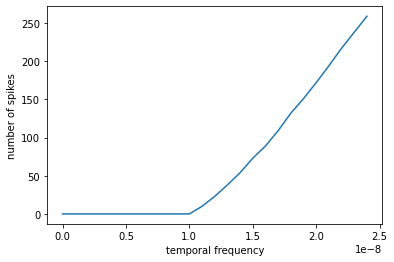

In [52]:
## Next, using a for loop to repeat this simulation multiple times while changing the oscillation frequency of the input

## Initializing simulation
V, spikes = initialize_simulation()

Is = np.arange(0, 25e-9, 1e-9)
nspikes = np.zeros(len(Is))

for ii in np.arange(len(Is)):
    for i, t in islice(enumerate(time), 1, None):
        
        if (t > stim_time[0]) and (t < stim_time[1]):
            Ie = Is[ii]
        else: 
            Ie =  0
            
        ## Calling integrate_and_fire function
        V, spikes = integrate_and_fire(V, spikes, i, Ie)
            
    nspikes[ii] = np.sum(spikes) 

plt.show()
plt.plot(Is, nspikes)
plt.ylabel('number of spikes')
plt.xlabel('temporal frequency')


#Use oscillation frequencies ranging from 15 to 50 Hz, with an interval of 1 Hz, and a current amplitude of 40 nA. 
#How does the response of the LIF neuron - specifically in terms of the number of spikes - change with the temporal frequency of the input current?